In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO (1).csv')

In [3]:
df.shape

(4340, 8)

In [4]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
sellers=df['seller_type'].unique()
print(sellers)

['Individual' 'Dealer' 'Trustmark Dealer']


In [6]:
fuel=df['fuel'].unique()
print(fuel)

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [7]:
transmission=df['transmission'].unique()
print(transmission)

['Manual' 'Automatic']


In [8]:
owner=df['owner'].unique()
print(owner)

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [9]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
dataset=df[['selling_price','km_driven','fuel','seller_type','transmission','owner']]
dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,Petrol,Individual,Manual,First Owner
1,135000,50000,Petrol,Individual,Manual,First Owner
2,600000,100000,Diesel,Individual,Manual,First Owner
3,250000,46000,Petrol,Individual,Manual,First Owner
4,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [13]:
dataset.head()

,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,1,0,0,0,1,0,1,0,1,0,0


In [14]:
dataset.corr()

,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
fuel_Diesel,0.282947,0.285396,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802
owner_Fourth & Above Owner,-0.078725,0.097349,-0.021054,-0.002094,0.013384,0.011502,0.072322,-0.021395,0.035597,1.000000,-0.080648,-0.008648,-0.037849


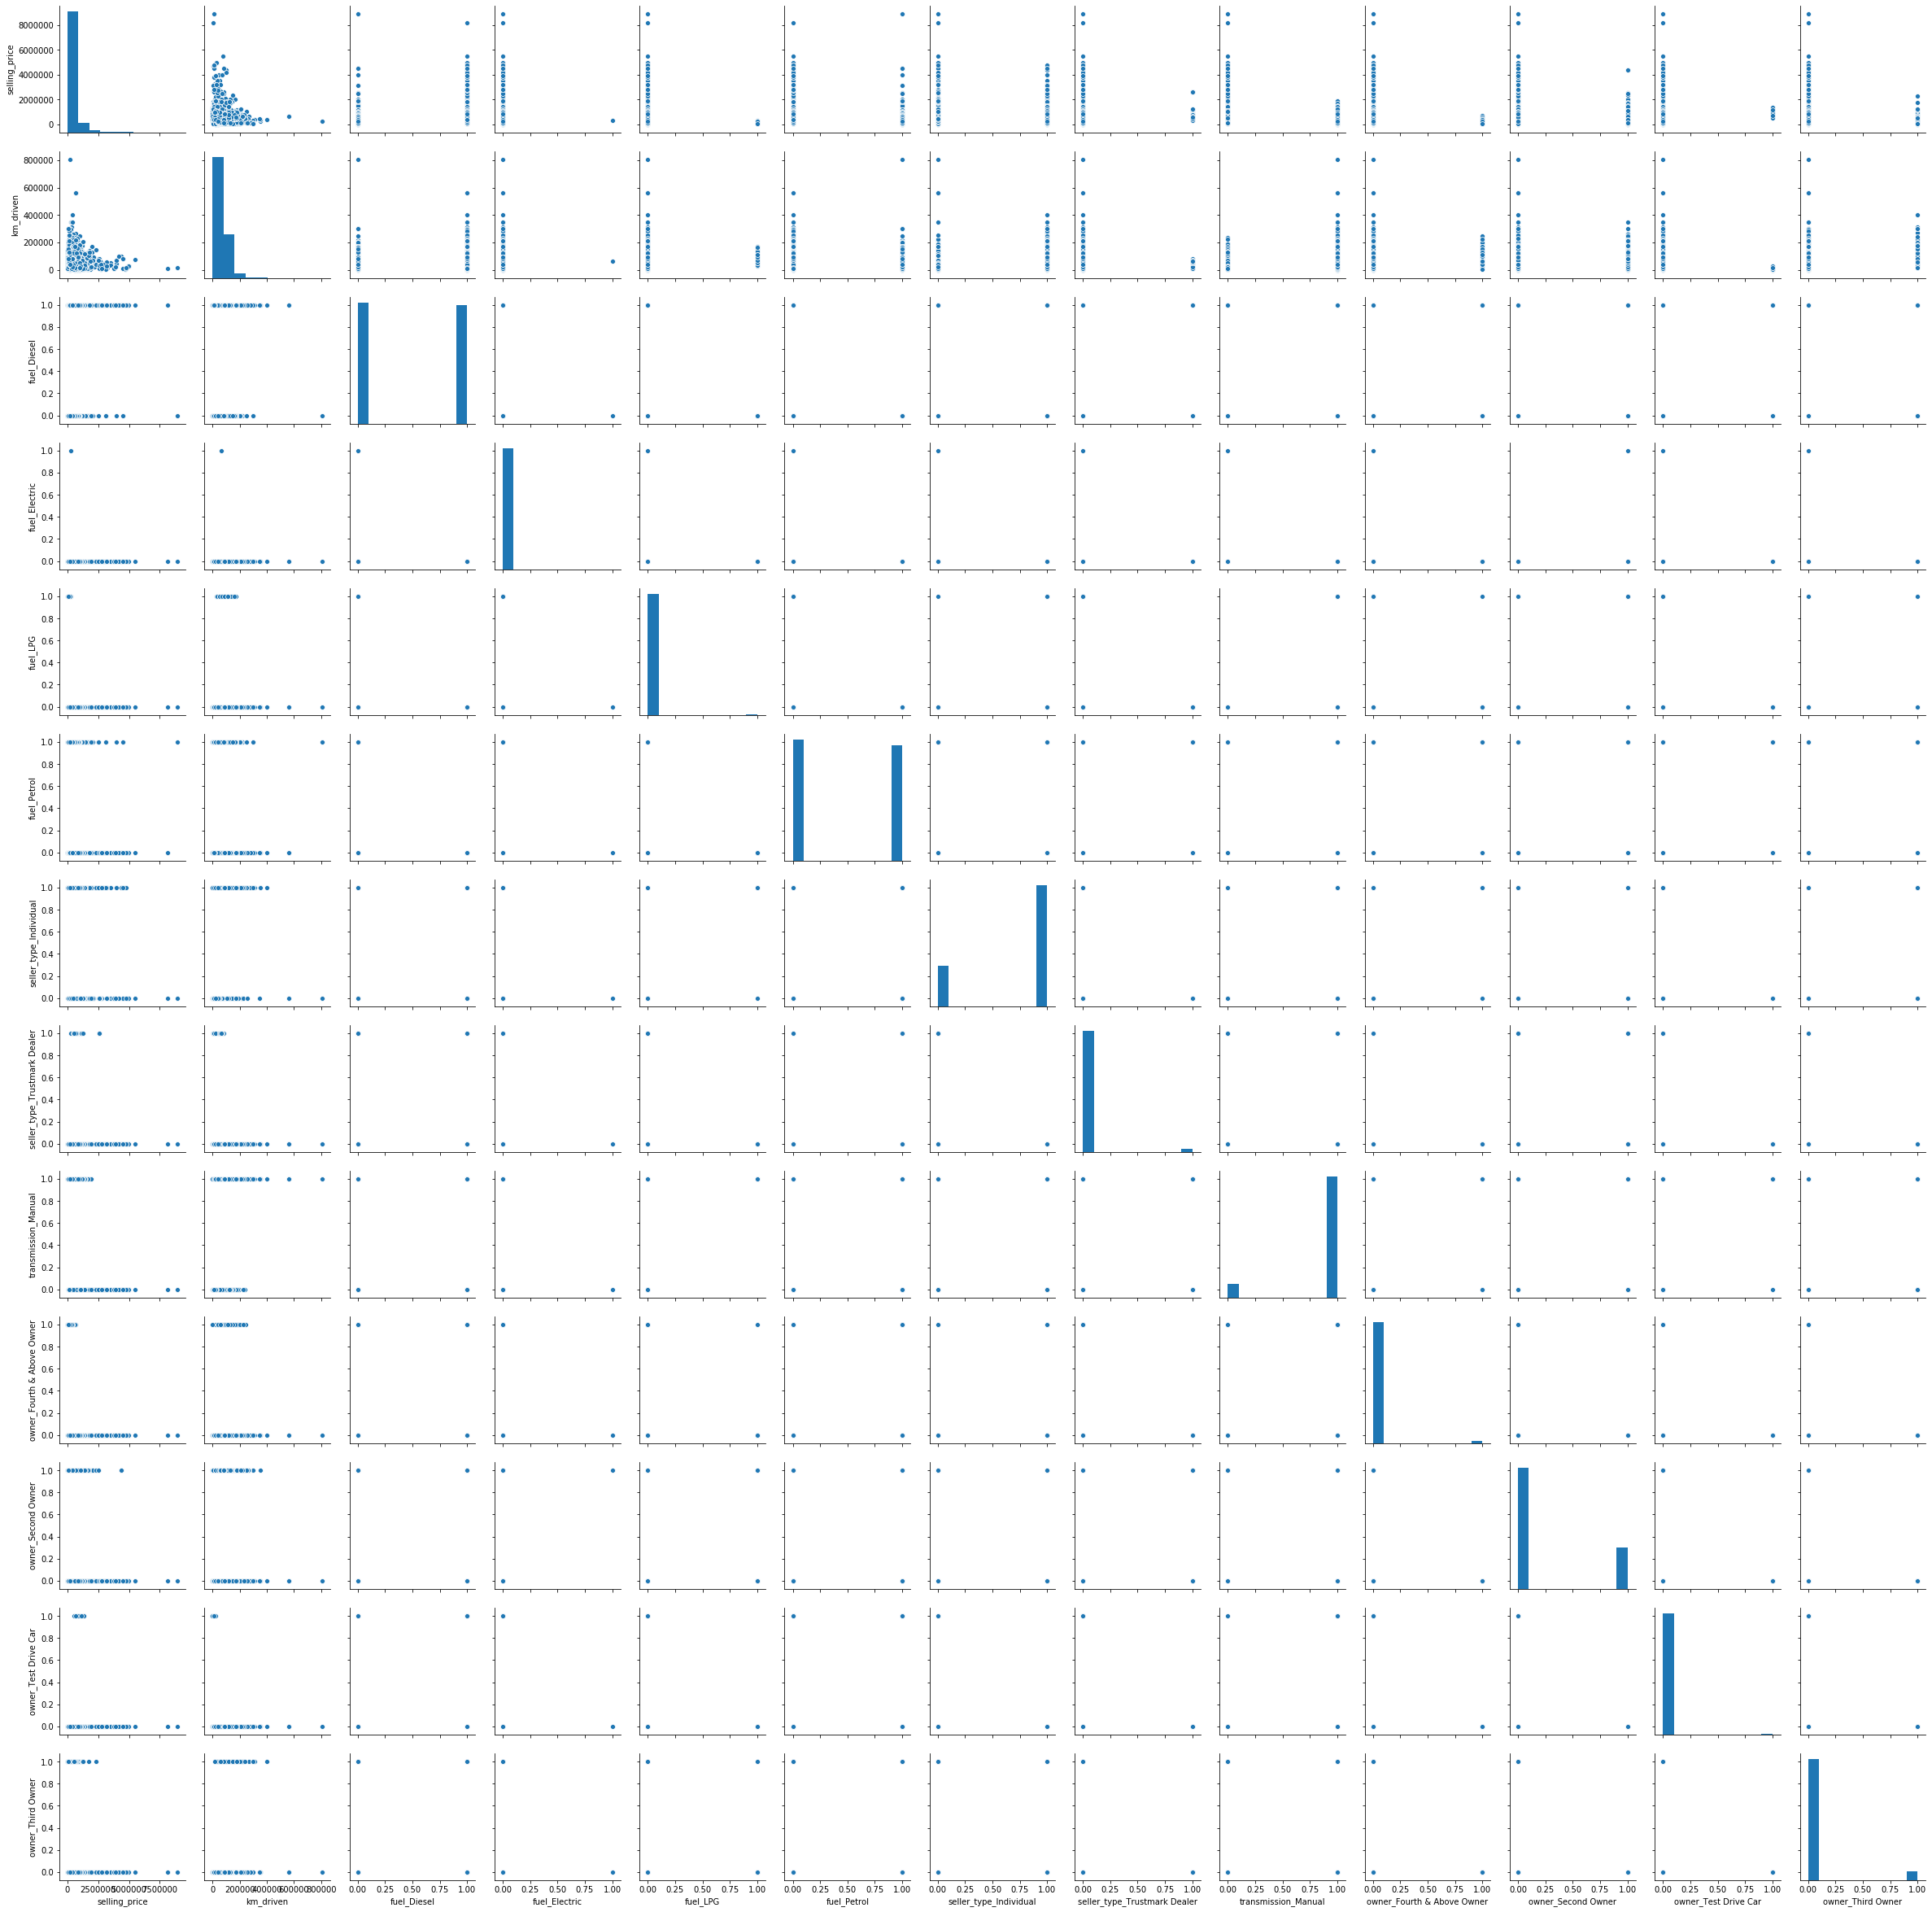

In [15]:
sns.pairplot(dataset)

In [16]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [17]:
X.head()

,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,0,0,0,1,1,0,1,0,0,0,0
1,50000,0,0,0,1,1,0,1,0,0,0,0
2,100000,1,0,0,0,1,0,1,0,0,0,0
3,46000,0,0,0,1,1,0,1,0,0,0,0
4,141000,1,0,0,0,1,0,1,0,1,0,0


In [18]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [19]:
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [20]:
a=model.feature_importances_
print(a)

[4.09816710e-01 1.46011629e-01 1.33717499e-04 9.19510930e-05
 3.25899342e-04 3.35217621e-02 1.42824838e-02 3.26910469e-01
 4.65195868e-03 3.09950012e-02 2.04054180e-02 1.28529998e-02]


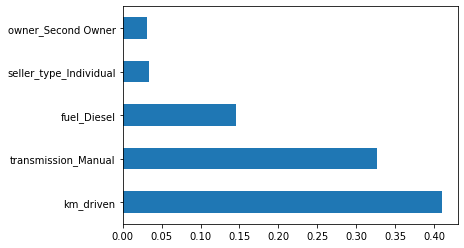

In [21]:
weight=pd.Series(a,index=X.columns)
weight.nlargest(5).plot(kind='barh')
plt.show()

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

model=RandomForestRegressor()
estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [23]:
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,1,0]
random_grid={'n_estimators':estimators,'max_features':max_features, 'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 1, 0]}


In [24]:
rf_random=RandomizedSearchCV(estimator=model, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=3,cv=6,verbose=3,random_state=20,n_jobs=1)
rf_random.fit(X_train,y_train)

Fitting 6 folds for each of 3 candidates, totalling 18 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-125783752400.438, total=   1.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-175772969791.256, total=   1.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-109478038026.598, total=   1.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-273022946102.367, total=   1.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-132918623999.561, total=   1.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-90901533382.033, total=   1.1s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5, score=nan, total=   0.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5, score=nan, total=   0.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5, score=nan, total=   0.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5, score=nan, total=   0.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5, score=nan, total=   0.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   12.2s finished


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=0, max_features=auto, max_depth=5, score=nan, total=   0.2s


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [25]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 25}

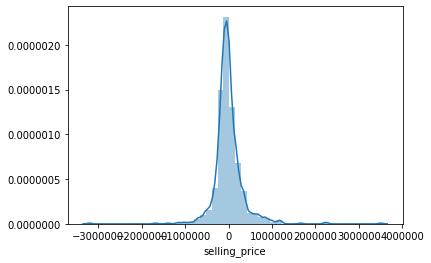

In [26]:
pred=rf_random.predict(X_test)
sns.distplot(y_test-pred)

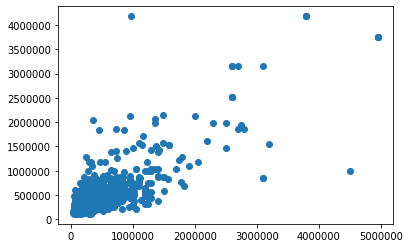

In [27]:
plt.scatter(y_test,pred)